<a href="https://colab.research.google.com/github/annagradziel/data-science/blob/master/01_wprowadzenie/dane_gieldowe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import bibliotek

In [1]:
import numpy as np
import pandas as pd

print(f'Numpy: {np.__version__}')
print(f'Pandas: {pd.__version__}')

Numpy: 1.17.5
Pandas: 0.25.3


In [2]:
def fetch_financial_data(company='AMZN'):
    """Pobiera dane dotyczące notowań spółek na giełdzie według symboli
    na serwisie stooq.pl"""
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')

df = fetch_financial_data()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2524 entries, 2020-01-13 to 2010-01-04
Data columns (total 5 columns):
Open      2524 non-null float64
High      2524 non-null float64
Low       2524 non-null float64
Close     2524 non-null float64
Volume    2523 non-null float64
dtypes: float64(5)
memory usage: 118.3 KB


In [3]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-13,1891.31,1898.00,1880.80,1891.30,2785844.0
2020-01-10,1905.37,1906.94,1880.00,1883.16,2856959.0
2020-01-09,1909.89,1917.82,1895.80,1901.05,3174962.0
2020-01-08,1898.04,1911.00,1886.44,1891.97,3511966.0
2020-01-07,1904.50,1913.89,1892.04,1906.86,4134010.0
...,...,...,...,...,...
2010-01-08,130.70,133.68,129.03,133.52,9826568.0
2010-01-07,131.96,132.32,128.80,130.00,11014197.0
2010-01-06,134.63,134.73,131.65,132.25,7178209.0


Metoda head() domyślnie zwróci nam 5 pierwszych wierszy

In [4]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-13,1891.31,1898.00,1880.80,1891.30,2785844.0
2020-01-10,1905.37,1906.94,1880.00,1883.16,2856959.0
2020-01-09,1909.89,1917.82,1895.80,1901.05,3174962.0
2020-01-08,1898.04,1911.00,1886.44,1891.97,3511966.0
2020-01-07,1904.50,1913.89,1892.04,1906.86,4134010.0


Możemy też podać paramentr, z liczbą wierszy które chcemy wyświetlić 

In [5]:
df.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-13,1891.31,1898.00,1880.8,1891.30,2785844.0
2020-01-10,1905.37,1906.94,1880.0,1883.16,2856959.0
2020-01-09,1909.89,1917.82,1895.8,1901.05,3174962.0


Jeżeli chcemy podejrzeć koniec naszego obiektu możemy użyć metody tail()

In [6]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-08,130.70,133.68,129.03,133.52,9826568.0
2010-01-07,131.96,132.32,128.80,130.00,11014197.0
2010-01-06,134.63,134.73,131.65,132.25,7178209.0
2010-01-05,133.25,135.48,131.81,134.69,8851066.0
2010-01-04,136.28,136.61,133.14,133.90,7595995.0


In [7]:
df.tail(3)

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-06,134.63,134.73,131.65,132.25,7178209.0
2010-01-05,133.25,135.48,131.81,134.69,8851066.0
2010-01-04,136.28,136.61,133.14,133.90,7595995.0


In [8]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

Zmiana liter w nazwach kolumn na małe

In [10]:
df.columns = [col.lower() for col in df.columns]
df

,open,high,low,close,volume
Date,,,,,
2020-01-13,1891.31,1898.00,1880.80,1891.30,2785844.0
2020-01-10,1905.37,1906.94,1880.00,1883.16,2856959.0
2020-01-09,1909.89,1917.82,1895.80,1901.05,3174962.0
2020-01-08,1898.04,1911.00,1886.44,1891.97,3511966.0
2020-01-07,1904.50,1913.89,1892.04,1906.86,4134010.0
...,...,...,...,...,...
2010-01-08,130.70,133.68,129.03,133.52,9826568.0
2010-01-07,131.96,132.32,128.80,130.00,11014197.0
2010-01-06,134.63,134.73,131.65,132.25,7178209.0


In [11]:
df.describe()

,open,high,low,close,volume
count,2524.000000,2524.000000,2524.000000,2524.000000,2.523000e+03
mean,680.221327,686.663435,672.752140,680.067248,4.467063e+06
std,583.957865,588.825993,577.798657,583.549701,2.853702e+06
min,105.930000,111.290000,105.800000,108.610000,8.813370e+05
25%,227.720000,231.322500,225.380000,228.335000,2.725070e+06
50%,376.945000,380.090000,374.215000,376.840000,3.736928e+06
75%,975.115000,979.937500,965.062500,971.762500,5.273227e+06
max,2038.110000,2050.500000,2013.000000,2039.510000,4.239664e+07


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
open,2524.0,6.802213e+02,5.839579e+02,105.93,2.277200e+02,376.945,9.751150e+02,2038.11
high,2524.0,6.866634e+02,5.888260e+02,111.29,2.313225e+02,380.090,9.799375e+02,2050.50
low,2524.0,6.727521e+02,5.777987e+02,105.80,2.253800e+02,374.215,9.650625e+02,2013.00
close,2524.0,6.800672e+02,5.835497e+02,108.61,2.283350e+02,376.840,9.717625e+02,2039.51
volume,2523.0,4.467063e+06,2.853702e+06,881337.00,2.725070e+06,3736928.000,5.273227e+06,42396643.00


# Selekcja kolumn

In [14]:
df = df.head(10)
df

,open,high,low,close,volume
Date,,,,,
2020-01-13,1891.31,1898.00,1880.80,1891.30,2785844.0
2020-01-10,1905.37,1906.94,1880.00,1883.16,2856959.0
2020-01-09,1909.89,1917.82,1895.80,1901.05,3174962.0
2020-01-08,1898.04,1911.00,1886.44,1891.97,3511966.0
2020-01-07,1904.50,1913.89,1892.04,1906.86,4134010.0
2020-01-06,1860.00,1903.69,1860.00,1902.88,4065698.0
2020-01-03,1864.50,1886.20,1864.50,1874.97,3766604.0
2020-01-02,1875.00,1898.01,1864.15,1898.01,4035910.0
2019-12-31,1842.00,1853.26,1832.23,1847.84,2510380.0


In [15]:
df.open

Date
2020-01-13    1891.31
2020-01-10    1905.37
2020-01-09    1909.89
2020-01-08    1898.04
2020-01-07    1904.50
2020-01-06    1860.00
2020-01-03    1864.50
2020-01-02    1875.00
2019-12-31    1842.00
2019-12-30    1874.00
Name: open, dtype: float64

In [17]:
df[['open','close']]

,open,close
Date,,
2020-01-13,1891.31,1891.30
2020-01-10,1905.37,1883.16
2020-01-09,1909.89,1901.05
2020-01-08,1898.04,1891.97
2020-01-07,1904.50,1906.86
2020-01-06,1860.00,1902.88
2020-01-03,1864.50,1874.97
2020-01-02,1875.00,1898.01
2019-12-31,1842.00,1847.84


In [18]:
df.iloc[:,0]

Date
2020-01-13    1891.31
2020-01-10    1905.37
2020-01-09    1909.89
2020-01-08    1898.04
2020-01-07    1904.50
2020-01-06    1860.00
2020-01-03    1864.50
2020-01-02    1875.00
2019-12-31    1842.00
2019-12-30    1874.00
Name: open, dtype: float64

In [19]:
df.iloc[:,[0,3]]

,open,close
Date,,
2020-01-13,1891.31,1891.30
2020-01-10,1905.37,1883.16
2020-01-09,1909.89,1901.05
2020-01-08,1898.04,1891.97
2020-01-07,1904.50,1906.86
2020-01-06,1860.00,1902.88
2020-01-03,1864.50,1874.97
2020-01-02,1875.00,1898.01
2019-12-31,1842.00,1847.84


In [20]:
df.iloc[:, 3:5]

,close,volume
Date,,
2020-01-13,1891.30,2785844.0
2020-01-10,1883.16,2856959.0
2020-01-09,1901.05,3174962.0
2020-01-08,1891.97,3511966.0
2020-01-07,1906.86,4134010.0
2020-01-06,1902.88,4065698.0
2020-01-03,1874.97,3766604.0
2020-01-02,1898.01,4035910.0
2019-12-31,1847.84,2510380.0


In [21]:
df.iloc[:, -1]


Date
2020-01-13    2785844.0
2020-01-10    2856959.0
2020-01-09    3174962.0
2020-01-08    3511966.0
2020-01-07    4134010.0
2020-01-06    4065698.0
2020-01-03    3766604.0
2020-01-02    4035910.0
2019-12-31    2510380.0
2019-12-30    3677306.0
Name: volume, dtype: float64

In [22]:
df.iloc[:, [-1]]


,volume
Date,
2020-01-13,2785844.0
2020-01-10,2856959.0
2020-01-09,3174962.0
2020-01-08,3511966.0
2020-01-07,4134010.0
2020-01-06,4065698.0
2020-01-03,3766604.0
2020-01-02,4035910.0
2019-12-31,2510380.0


In [23]:
df.iloc[:, -3:]

,low,close,volume
Date,,,
2020-01-13,1880.80,1891.30,2785844.0
2020-01-10,1880.00,1883.16,2856959.0
2020-01-09,1895.80,1901.05,3174962.0
2020-01-08,1886.44,1891.97,3511966.0
2020-01-07,1892.04,1906.86,4134010.0
2020-01-06,1860.00,1902.88,4065698.0
2020-01-03,1864.50,1874.97,3766604.0
2020-01-02,1864.15,1898.01,4035910.0
2019-12-31,1832.23,1847.84,2510380.0


# Selekcja wierszy

In [24]:
df.iloc[0]

open         1891.31
high         1898.00
low          1880.80
close        1891.30
volume    2785844.00
Name: 2020-01-13 00:00:00, dtype: float64

In [25]:
df.iloc[:3]

,open,high,low,close,volume
Date,,,,,
2020-01-13,1891.31,1898.00,1880.8,1891.30,2785844.0
2020-01-10,1905.37,1906.94,1880.0,1883.16,2856959.0
2020-01-09,1909.89,1917.82,1895.8,1901.05,3174962.0


In [27]:
df.loc['2020-01-13']

,open,high,low,close,volume
Date,,,,,
2020-01-13,1891.31,1898.0,1880.8,1891.3,2785844.0


In [30]:
df.loc['2020-01-13':'2020-01-08']

,open,high,low,close,volume
Date,,,,,
2020-01-13,1891.31,1898.00,1880.80,1891.30,2785844.0
2020-01-10,1905.37,1906.94,1880.00,1883.16,2856959.0
2020-01-09,1909.89,1917.82,1895.80,1901.05,3174962.0
2020-01-08,1898.04,1911.00,1886.44,1891.97,3511966.0


# Olbiczanie nowych kolumn

In [31]:
df = fetch_financial_data('UBER')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 171 entries, 2020-01-13 to 2019-05-10
Data columns (total 5 columns):
Open      171 non-null float64
High      171 non-null float64
Low       171 non-null float64
Close     171 non-null float64
Volume    171 non-null int64
dtypes: float64(4), int64(1)
memory usage: 8.0 KB


In [32]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-13,34.29,34.34,33.550,34.14,16833139
2020-01-10,34.08,34.99,33.835,34.01,34276990
2020-01-09,34.45,34.47,33.220,33.97,29407616
2020-01-08,32.73,34.52,32.460,33.93,43955449
2020-01-07,31.79,32.84,31.360,32.81,30268966
...,...,...,...,...,...
2019-05-16,41.48,44.06,41.250,43.00,38115524
2019-05-15,39.37,41.88,38.950,41.29,36086065
2019-05-14,38.31,39.96,36.850,39.96,46661147


In [33]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-13,34.29,34.34,33.550,34.14,16833139
2020-01-10,34.08,34.99,33.835,34.01,34276990
2020-01-09,34.45,34.47,33.220,33.97,29407616
2020-01-08,32.73,34.52,32.460,33.93,43955449
2020-01-07,31.79,32.84,31.360,32.81,30268966


In [34]:
df.describe()

,Open,High,Low,Close,Volume
count,171.000000,171.000000,171.000000,171.000000,1.710000e+02
mean,35.469289,36.073392,34.751110,35.411930,1.931225e+07
std,6.123130,6.184503,5.984763,6.041434,2.156719e+07
min,26.060000,26.800000,25.580000,25.990000,3.380003e+06
25%,30.275000,30.742500,29.804300,30.230000,7.843396e+06
50%,33.460000,34.230000,32.920000,33.310000,1.081714e+07
75%,42.000000,42.930000,41.250000,42.025000,2.359321e+07
max,46.980000,47.080000,45.080000,46.380000,1.863225e+08


Budowanie nowej kolumny

In [0]:
df['Average'] = (df.Open + df.Close)/2.0

In [36]:
df

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2020-01-13,34.29,34.34,33.550,34.14,16833139,34.215
2020-01-10,34.08,34.99,33.835,34.01,34276990,34.045
2020-01-09,34.45,34.47,33.220,33.97,29407616,34.210
2020-01-08,32.73,34.52,32.460,33.93,43955449,33.330
2020-01-07,31.79,32.84,31.360,32.81,30268966,32.300
...,...,...,...,...,...,...
2019-05-16,41.48,44.06,41.250,43.00,38115524,42.240
2019-05-15,39.37,41.88,38.950,41.29,36086065,40.330
2019-05-14,38.31,39.96,36.850,39.96,46661147,39.135


Metoda sort_index posoruje nasze indeksy

In [37]:
df.sort_index()

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2019-05-10,42.00,45.00,41.060,41.57,186322536,41.785
2019-05-13,38.79,39.24,36.080,37.10,79442420,37.945
2019-05-14,38.31,39.96,36.850,39.96,46661147,39.135
2019-05-15,39.37,41.88,38.950,41.29,36086065,40.330
2019-05-16,41.48,44.06,41.250,43.00,38115524,42.240
...,...,...,...,...,...,...
2020-01-07,31.79,32.84,31.360,32.81,30268966,32.300
2020-01-08,32.73,34.52,32.460,33.93,43955449,33.330
2020-01-09,34.45,34.47,33.220,33.97,29407616,34.210


In [0]:
df = df.sort_index()

In [39]:
df

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2019-05-10,42.00,45.00,41.060,41.57,186322536,41.785
2019-05-13,38.79,39.24,36.080,37.10,79442420,37.945
2019-05-14,38.31,39.96,36.850,39.96,46661147,39.135
2019-05-15,39.37,41.88,38.950,41.29,36086065,40.330
2019-05-16,41.48,44.06,41.250,43.00,38115524,42.240
...,...,...,...,...,...,...
2020-01-07,31.79,32.84,31.360,32.81,30268966,32.300
2020-01-08,32.73,34.52,32.460,33.93,43955449,33.330
2020-01-09,34.45,34.47,33.220,33.97,29407616,34.210


Jak policzyć dzienną zmianę procentową?

Metoda shift pozwoli nam przesunąć nasze dane o x wierszy. W tym przypadku nie możemy policzyć zmiany dla pierwszej wartości 

In [40]:
df['Close_shift'] = df.Close.shift(1) 
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift
Date,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29


W nowo powstałej kolumnie dla pierwszego wiersza został przypisany brak danych

In [43]:
df['Daily Change'] = df.Close / df.Close.shift(1) -1
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change,Daily Change
Date,,,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN,NaN,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57,-0.107529,-0.107529
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089,0.077089
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96,0.033283,0.033283
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29,0.041414,0.041414


Metoda del usuwa niepotrzebną kolumnę

In [0]:

del df['Daily Change']

In [45]:
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29,0.041414


Największy spadek

In [46]:
df.Daily_Change.min()

-0.10752946836661048

Największy dzienny wzrost

In [47]:
df.Daily_Change.max()

0.08236775818639797

Jak wyświetlić histogram z poziomu biblioteki pandas? Przy pomocy metody hist. Przy pomocy parametru bins podajemy liczbę słupków. 

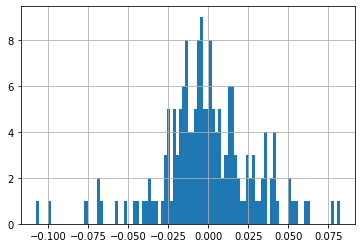

In [48]:
df.Daily_Change.hist(bins=100)

Gdy chcemy użyć nieco przyjemniejszego stylu, możemy zaimrotować sobie bibliotekę seaborn (biblioteka do wizualizacj statystycznych) 

In [0]:
import seaborn as sns
sns.set()

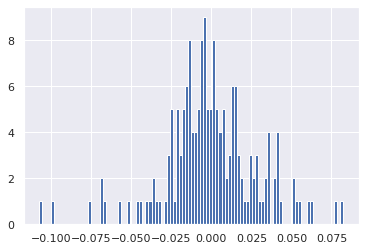

In [52]:
df.Daily_Change.hist(bins=100)

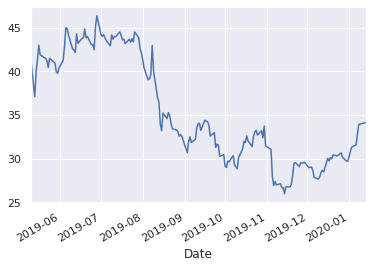

In [53]:
df.Close.plot()

# Filtrowanie danych

In [54]:
df

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.00,41.060,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.24,36.080,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.96,36.850,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.88,38.950,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.06,41.250,43.00,38115524,42.240,41.29,0.041414
...,...,...,...,...,...,...,...,...
2020-01-07,31.79,32.84,31.360,32.81,30268966,32.300,31.58,0.038949
2020-01-08,32.73,34.52,32.460,33.93,43955449,33.330,32.81,0.034136
2020-01-09,34.45,34.47,33.220,33.97,29407616,34.210,33.93,0.001179


In [58]:
df_positive = df[df.Daily_Change > 0]
df_positive

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-14,38.31,39.96,36.850,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.88,38.950,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.06,41.250,43.00,38115524,42.240,41.29,0.041414
2019-05-24,41.28,41.51,40.500,41.51,8786751,41.395,40.47,0.025698
2019-05-31,41.15,41.57,39.410,40.41,23209848,40.780,39.80,0.015327
...,...,...,...,...,...,...,...,...
2020-01-07,31.79,32.84,31.360,32.81,30268966,32.300,31.58,0.038949
2020-01-08,32.73,34.52,32.460,33.93,43955449,33.330,32.81,0.034136
2020-01-09,34.45,34.47,33.220,33.97,29407616,34.210,33.93,0.001179


Średnia dodatnia stopa zwrotu

In [56]:
df_positive.Daily_Change.mean()

0.021788320787401394

In [60]:
df_negative = df[df.Daily_Change < 0]
df_negative

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-13,38.79,39.24,36.0800,37.10,79442420,37.945,41.57,-0.107529
2019-05-17,41.98,43.29,41.2700,41.91,20225687,41.945,43.00,-0.025349
2019-05-20,41.19,41.68,39.4600,41.59,29222330,41.390,41.91,-0.007635
2019-05-21,42.00,42.24,41.2500,41.50,10802851,41.750,41.59,-0.002164
2019-05-22,41.05,41.28,40.5000,41.25,9089469,41.150,41.50,-0.006024
...,...,...,...,...,...,...,...,...
2019-12-17,30.37,30.42,29.5300,29.75,38254270,30.060,30.05,-0.009983
2019-12-19,29.84,30.17,29.5301,29.99,33816868,29.915,30.13,-0.004647
2019-12-23,30.49,30.94,29.8300,30.33,31212255,30.410,30.45,-0.003941


Średnia ujemna stpa zwrotu

In [61]:
df_negative.Daily_Change.mean()

-0.020522046451616222

Jak sprawdzić czy cena zamknięcia była równa najwyższej cenie w ciągu dnia?

In [62]:

df.Close == df.High

Date
2019-05-10    False
2019-05-13    False
2019-05-14     True
2019-05-15    False
2019-05-16    False
              ...  
2020-01-07    False
2020-01-08    False
2020-01-09    False
2020-01-10    False
2020-01-13    False
Length: 171, dtype: bool

In [63]:

df[df.Close == df.High]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-24,41.28,41.51,40.50,41.51,8786751,41.395,40.47,0.025698


In [64]:
df[df.Close == df.Low]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-08-12,39.84,39.95,37.00,37.00,20632310,38.420,40.05,-0.076155
2019-12-09,27.96,28.36,27.68,27.68,21098387,27.820,27.86,-0.006461
2019-12-27,30.80,31.06,30.17,30.17,18465965,30.485,30.67,-0.016303


In [65]:
df.index > '2019-11-01'

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True,

In [66]:
df[df.index > '2019-11-01']

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-11-04,31.450,31.750,30.1200,31.08,32330121,31.2650,31.37,-0.009245
2019-11-05,29.130,29.300,27.9700,28.02,52180615,28.5750,31.08,-0.098456
2019-11-06,26.060,27.550,25.5800,26.94,133569790,26.5000,28.02,-0.038544
2019-11-07,26.800,27.420,26.4500,27.38,65949472,27.0900,26.94,0.016333
2019-11-08,27.480,27.620,26.9150,27.01,45263118,27.2450,27.38,-0.013514
2019-11-11,27.030,27.210,26.2300,27.14,41445732,27.0850,27.01,0.004813
2019-11-12,27.380,27.660,26.6600,26.70,37095389,27.0400,27.14,-0.016212
2019-11-13,26.470,26.820,26.1400,26.71,34512663,26.5900,26.70,0.000375
2019-11-14,26.800,26.860,25.6650,25.99,28027875,26.3950,26.71,-0.026956


In [67]:
df[(df.index >= '2019-11-01') & (df.index < '2019-11-15')]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-11-01,31.45,31.70,30.7412,31.37,10460430,31.410,31.50,-0.004127
2019-11-04,31.45,31.75,30.1200,31.08,32330121,31.265,31.37,-0.009245
2019-11-05,29.13,29.30,27.9700,28.02,52180615,28.575,31.08,-0.098456
2019-11-06,26.06,27.55,25.5800,26.94,133569790,26.500,28.02,-0.038544
2019-11-07,26.80,27.42,26.4500,27.38,65949472,27.090,26.94,0.016333
2019-11-08,27.48,27.62,26.9150,27.01,45263118,27.245,27.38,-0.013514
2019-11-11,27.03,27.21,26.2300,27.14,41445732,27.085,27.01,0.004813
2019-11-12,27.38,27.66,26.6600,26.70,37095389,27.040,27.14,-0.016212
2019-11-13,26.47,26.82,26.1400,26.71,34512663,26.590,26.70,0.000375


In [68]:
df[(df.index == '2019-11-01') | (df.index == '2019-11-07')]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-11-01,31.45,31.70,30.7412,31.37,10460430,31.41,31.50,-0.004127
2019-11-07,26.80,27.42,26.4500,27.38,65949472,27.09,26.94,0.016333


In [69]:
df

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.00,41.060,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.24,36.080,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.96,36.850,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.88,38.950,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.06,41.250,43.00,38115524,42.240,41.29,0.041414
...,...,...,...,...,...,...,...,...
2020-01-07,31.79,32.84,31.360,32.81,30268966,32.300,31.58,0.038949
2020-01-08,32.73,34.52,32.460,33.93,43955449,33.330,32.81,0.034136
2020-01-09,34.45,34.47,33.220,33.97,29407616,34.210,33.93,0.001179


In [70]:
df[df.index.month == 5]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.00,41.0600,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.24,36.0800,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.96,36.8500,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.88,38.9500,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.06,41.2500,43.00,38115524,42.240,41.29,0.041414
2019-05-17,41.98,43.29,41.2700,41.91,20225687,41.945,43.00,-0.025349
2019-05-20,41.19,41.68,39.4600,41.59,29222330,41.390,41.91,-0.007635
2019-05-21,42.00,42.24,41.2500,41.50,10802851,41.750,41.59,-0.002164
2019-05-22,41.05,41.28,40.5000,41.25,9089469,41.150,41.50,-0.006024


In [71]:
df[df.index.day == 1]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-07-01,46.98,47.0400,44.0600,44.27,17739998,45.625,46.38,-0.045494
2019-08-01,42.14,42.5355,41.0000,41.31,7349740,41.725,42.14,-0.019696
2019-10-01,30.37,30.5100,28.6500,29.15,13448055,29.760,30.47,-0.043321
2019-11-01,31.45,31.7000,30.7412,31.37,10460430,31.410,31.50,-0.004127
